# Основы глубинного обучения, майнор ИАД

## Домашнее задание 1. Введение в PyTorch. Полносвязные нейронные сети.

### Общая информация

Дата выдачи: 20.09.2022

Мягкий дедлайн: 23:59MSK 04.10.2022

Жесткий дедлайн: 23:59MSK 10.10.2022

### Оценивание и штрафы
Максимально допустимая оценка за работу — 10 баллов. За каждый день просрочки снимается 1 балл. Сдавать задание после жёсткого дедлайна сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этом задании вам предстоит предсказывать год выпуска песни (**задача регрессии**) по некоторым звуковым признакам: [данные](https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd). В ячейках ниже находится код для загрузки данных. Обратите внимание, что обучающая и тестовая выборки располагаются в одном файле, поэтому НЕ меняйте ячейку, в которой производится деление данных.

In [ ]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import random
import os
import sys


In [ ]:
!wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

--2022-10-10 11:23:35--  https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211011981 (201M) [application/x-httpd-php]
Saving to: ‘data.txt.zip’

data.txt.zip        100%[===================>] 201.24M  16.5MB/s    in 13s     

2022-10-10 11:23:50 (15.0 MB/s) - ‘data.txt.zip’ saved [211011981/211011981]



In [ ]:
df = pd.read_csv('data.txt.zip', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [ ]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = 463715#5000


X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test =y[train_size:]

In [ ]:
np.unique(y)

array([1922, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011])

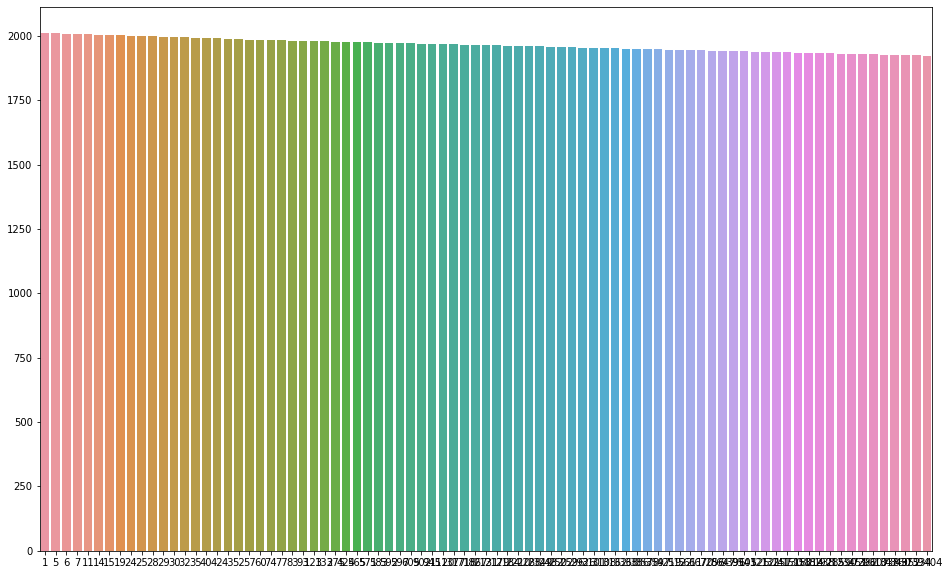

In [ ]:
#Examining target distribution -> evenly distributed, our sample should be distr evenly too.
# https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd this says the data does not have nan values

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(16,10))

y_pd =  pd.DataFrame(y)

sns.barplot(x = y_pd.value_counts(), y = np.unique(y_pd))

#Data target is pretty much equalized, however will have to normalize it

## Задание 0. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Мы будем использовать RMSE как метрику качества. Для самого первого бейзлайна обучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

In [ ]:
# (－.－)...zzzZZZzzzZZZ
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

rid = Ridge(alpha=.5)
rid.fit(X_train, y_train)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print('RMSE RIDGE: ', mean_squared_error(y_test, rid.predict(X_test), squared=False))
print('RMSE LINREG: ', mean_squared_error(y_test, lin_reg.predict(X_test), squared=False))
# With different alphas rmse is pretty much the same 9.51

RMSE RIDGE:  9.510160709431005
RMSE LINREG:  9.510160707488623


## Задание 1. (максимум 10 баллов)

Реализуйте обучение и тестирование нейронной сети для предоставленного вам набора данных. Соотношение между полученным значением метрики на тестовой выборке и баллами за задание следующее:

- $\text{RMSE} \le 9.00 $ &mdash; 4 балла
- $\text{RMSE} \le 8.90 $ &mdash; 6 баллов
- $\text{RMSE} \le 8.80 $ &mdash; 8 баллов
- $\text{RMSE} \le 8.75 $ &mdash; 10 баллов

Есть несколько правил, которых вам нужно придерживаться:

- Весь пайплайн обучения должен быть написан на PyTorch. При этом вы можете пользоваться другими библиотеками (`numpy`, `sklearn` и пр.), но только для обработки данных. То есть как угодно трансформировать данные и считать метрики с помощью этих библиотек можно, а импортировать модели из `sklearn` и выбивать с их помощью требуемое качество &mdash; нельзя. Также нельзя пользоваться библиотеками, для которых сам PyTorch является зависимостью.

- Мы никак не ограничиваем ваш выбор архитектуры модели, но скорее всего вам будет достаточно полносвязной нейронной сети.

- Для обучения запрещается использовать какие-либо иные данные, кроме обучающей выборки.

- Ансамблирование моделей запрещено.

### Полезные советы:

- Очень вряд ли, что у вас с первого раза получится выбить качество на 10 баллов, поэтому пробуйте разные архитектуры, оптимизаторы и значения гиперпараметров. В идеале при запуске каждого нового эксперимента вы должны менять что-то одно, чтобы точно знать, как этот фактор влияет на качество.

- Не забудьте, что для улучшения качества модели вам поможет **нормировка таргета**.

- Тот факт, что мы занимаемся глубинным обучением, не означает, что стоит забывать про приемы, использующиеся в классическом машинном обучении. Так что обязательно проводите исследовательский анализ данных, отрисовывайте нужные графики и не забывайте про масштабирование и подбор гиперпараметров.

- Вы наверняка столкнетесь с тем, что ваша нейронная сеть будет сильно переобучаться. Для нейросетей существуют специальные методы регуляризации, например, dropout ([статья](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)) и weight decay ([блогпост](https://towardsdatascience.com/weight-decay-l2-regularization-90a9e17713cd)). Они, разумеется, реализованы в PyTorch. Попробуйте поэкспериментировать с ними.

- Если вы чего-то не знаете, не гнушайтесь гуглить. В интернете очень много полезной информации, туториалов и советов по глубинному обучению в целом и по PyTorch в частности. Но не забывайте, что за скатанный код без ссылки на источник придется ответить по всей строгости!

- Если вы сразу реализуете обучение на GPU, то у вас будет больше времени на эксперименты, так как любые вычисления будут работать быстрее. Google Colab предоставляет несколько GPU-часов (обычно около 8-10) в сутки бесплатно.

- Чтобы отладить код, можете обучаться на небольшой части данных или даже на одном батче. Если лосс на обучающей выборке не падает, то что-то точно идет не так!

- Пользуйтесь утилитами, которые вам предоставляет PyTorch (например, Dataset и Dataloader). Их специально разработали для упрощения разработки пайплайна обучения.

- Скорее всего вы захотите отслеживать прогресс обучения. Для создания прогресс-баров есть удобная библиотека `tqdm`.

- Быть может, вы захотите, чтобы графики рисовались прямо во время обучения. Можете воспользоваться функцией [clear_output](http://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.clear_output), чтобы удалять старый график и рисовать новый на его месте.

**ОБЯЗАТЕЛЬНО** рисуйте графики зависимости лосса/метрики на обучающей и тестовой выборках в зависимости от времени обучения. Если обучение занимает относительно небольшое число эпох, то лучше рисовать зависимость от номера шага обучения, если же эпох больше, то рисуйте зависимость по эпохам. Если проверяющий не увидит такого графика для вашей лучшей модели, то он в праве снизить баллы за задание.

**ВАЖНО!** Ваше решение должно быть воспроизводимым. Если это не так, то проверяющий имеет право снизить баллы за задание. Чтобы зафиксировать random seed, воспользуйтесь функцией из ячейки ниже.



Вы можете придерживаться любой адекватной струкуры кода, но мы советуем воспользоваться следующими сигнатурами функций. Лучше всего, если вы проверите ваши предсказания ассертом: так вы убережете себя от разных косяков, например, что вектор предсказаний состоит из всего одного числа. В любом случае, внимательно следите за тем, для каких тензоров вы считаете метрику RMSE. При случайном или намеренном введении в заблуждение проверяющие очень сильно разозлятся.

In [ ]:
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
set_random_seed(1337)

In [ ]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
from IPython.display import clear_output
from torch import nn, optim
from torchvision import transforms
from tqdm.auto import tqdm, trange

warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler_y.fit_transform(y_train.reshape(-1,1)).reshape(1,-1)[0]

In [ ]:
#https://www.programmersought.com/article/801910528222/   Will use it as basement for model and train-test part

class ModelBaseline(nn.Module):
    def __init__(self):
      super().__init__()
      self.dense1 = nn.Linear(90, 1024)
      self.dense2 = nn.Linear(1024, 512)
      self.dense3 = nn.Linear(512, 256)
      self.dense4 = nn.Linear(256, 128)
      self.dense5 = nn.Linear(128, 32)
      self.dense6 = nn.Linear(32, 1)
      self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = F.leaky_relu(self.dense1(x)) #using leaky relu as working with normalized targets (thanks to telegram guru who suggested it)
        x = self.dropout(x)
        x = F.leaky_relu(self.dense2(x))
        x = self.dropout(x)
        x = F.leaky_relu(self.dense3(x))
        x = self.dropout(x)
        x = F.leaky_relu(self.dense4(x))
        x = self.dropout(x)
        x = F.leaky_relu(self.dense5(x))
        x = self.dropout(x)
        out = F.leaky_relu(self.dense6(x))
        return out.flatten()


In [ ]:
#Using google colab w/ cuda, later *in tests* will have to do abracadabra with data going back to cpu. Did not test on my own cpu, might not work for you using cpu
device = 'cuda'
device

'cuda'

In [ ]:
#https://datahacker.rs/018-pytorch-popular-techniques-to-prevent-the-overfitting-in-a-neural-networks/ Using techniques such as weight decay and lr decreasing per epochs

from torchsummary import summary

train_features, train_targets = torch.tensor(X_train, dtype = torch.float, device = device), torch.tensor(y_train, dtype = torch.float, device = device)

test_features, test_targets = torch.tensor(X_test, dtype = torch.float, device = device), torch.tensor(y_test, dtype = torch.float, device = device)


train_set = torch.utils.data.TensorDataset(train_features, train_targets)
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 2048, shuffle = True)

test_set = torch.utils.data.TensorDataset(test_features, test_targets)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = 1024, shuffle = True)

model = ModelBaseline().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr = 0.001, weight_decay = 1e-4)
criterion = torch.nn.MSELoss()

summary(model, input_size=(1,90))  #number of params for 1 piece of data

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 1, 1024]          93,184
           Dropout-2              [-1, 1, 1024]               0
            Linear-3               [-1, 1, 512]         524,800
           Dropout-4               [-1, 1, 512]               0
            Linear-5               [-1, 1, 256]         131,328
           Dropout-6               [-1, 1, 256]               0
            Linear-7               [-1, 1, 128]          32,896
           Dropout-8               [-1, 1, 128]               0
            Linear-9                [-1, 1, 32]           4,128
          Dropout-10                [-1, 1, 32]               0
           Linear-11                 [-1, 1, 1]              33
Total params: 786,369
Trainable params: 786,369
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

In [ ]:
set_random_seed(1337)
#https://www.programmersought.com/article/801910528222/

def train(model, optimizer, criterion, train_loader, test_loader, n_epochs):

  history = []
  train_loss_all = []

  for epoch in range(n_epochs):
      model.train()
      train_loss = 0.0
      train_number = 0

      for data, targets in tqdm(train_loader):

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, targets)


        loss.backward()
        optimizer.step()

        train_loss += loss.data.item() * data.size(0)
        train_number += data.size(0)

      train_loss  = np.sqrt(train_loss / train_number)
      print('Train_loss in epoch #', epoch, ' = ', train_loss)

      history.append(train_loss) #for linegraph

      #Decreasing learning rate every 2 epochs
      if epoch % 2 == 0:
        optimizer.param_groups[0]['lr'] = optimizer.param_groups[0]['lr'] / 2
        lr_optim = optimizer.param_groups[0]['lr']
  return history

def test(model, criterion, test_loader):
    model.eval()

    test_loss = 0.0
    test_num  = 0

    with torch.no_grad():
        for X_test, y_test in tqdm(test_loader):

            y_pred = model(X_test)
            y_test = y_test.cpu() #abracadabra mentioned before

            inverted_y_pred = y_pred.clone().detach().cpu() #abracadabra mentioned before
            y_pred = torch.from_numpy(scaler_y.inverse_transform(inverted_y_pred.reshape(-1, 1))).flatten() #did decrease my test rmse significantly tho

            #Had to do check ups to make sure data is correct, you can uncomment and do it yourself
            #print("y_pred ", y_pred)
            #print("y_test ", y_test)

            loss = criterion(y_pred, y_test)

            test_loss += loss.data.item() * X_test.size(0)
            test_num  += X_test.size(0)

    test_loss = np.sqrt(test_loss / test_num)

    print("RMSE = ", test_loss)

    predicts = torch.ones(len(test_loader.dataset))
    return predicts


In [ ]:
#Training
set_random_seed(1337)

history_train = train(model, optimizer, criterion, train_loader, test_loader, 20)


  0%|          | 0/227 [00:00<?, ?it/s]

Train_loss in epoch # 0  =  0.8607883664797513


  0%|          | 0/227 [00:00<?, ?it/s]

Train_loss in epoch # 1  =  0.8050402371859731


  0%|          | 0/227 [00:00<?, ?it/s]

Train_loss in epoch # 2  =  0.7974218857725415


  0%|          | 0/227 [00:00<?, ?it/s]

Train_loss in epoch # 3  =  0.7889047227041541


  0%|          | 0/227 [00:00<?, ?it/s]

Train_loss in epoch # 4  =  0.7847342028755766


  0%|          | 0/227 [00:00<?, ?it/s]

Train_loss in epoch # 5  =  0.7804241266629198


  0%|          | 0/227 [00:00<?, ?it/s]

Train_loss in epoch # 6  =  0.7781608989632391


  0%|          | 0/227 [00:00<?, ?it/s]

Train_loss in epoch # 7  =  0.7751419704489201


  0%|          | 0/227 [00:00<?, ?it/s]

Train_loss in epoch # 8  =  0.7734785504488216


  0%|          | 0/227 [00:00<?, ?it/s]

Train_loss in epoch # 9  =  0.7722422109378804


  0%|          | 0/227 [00:00<?, ?it/s]

Train_loss in epoch # 10  =  0.7718880431501484


  0%|          | 0/227 [00:00<?, ?it/s]

Train_loss in epoch # 11  =  0.7706739984827811


  0%|          | 0/227 [00:00<?, ?it/s]

Train_loss in epoch # 12  =  0.7709407910628977


  0%|          | 0/227 [00:00<?, ?it/s]

Train_loss in epoch # 13  =  0.7700016564014858


  0%|          | 0/227 [00:00<?, ?it/s]

Train_loss in epoch # 14  =  0.7699520123324484


  0%|          | 0/227 [00:00<?, ?it/s]

Train_loss in epoch # 15  =  0.7694500879614167


  0%|          | 0/227 [00:00<?, ?it/s]

Train_loss in epoch # 16  =  0.770158772896048


  0%|          | 0/227 [00:00<?, ?it/s]

Train_loss in epoch # 17  =  0.7692700077973543


  0%|          | 0/227 [00:00<?, ?it/s]

Train_loss in epoch # 18  =  0.769415354945681


  0%|          | 0/227 [00:00<?, ?it/s]

Train_loss in epoch # 19  =  0.7699166366385519


[0.8607883664797513, 0.8050402371859731, 0.7974218857725415, 0.7889047227041541, 0.7847342028755766, 0.7804241266629198, 0.7781608989632391, 0.7751419704489201, 0.7734785504488216, 0.7722422109378804, 0.7718880431501484, 0.7706739984827811, 0.7709407910628977, 0.7700016564014858, 0.7699520123324484, 0.7694500879614167, 0.770158772896048, 0.7692700077973543, 0.769415354945681, 0.7699166366385519]


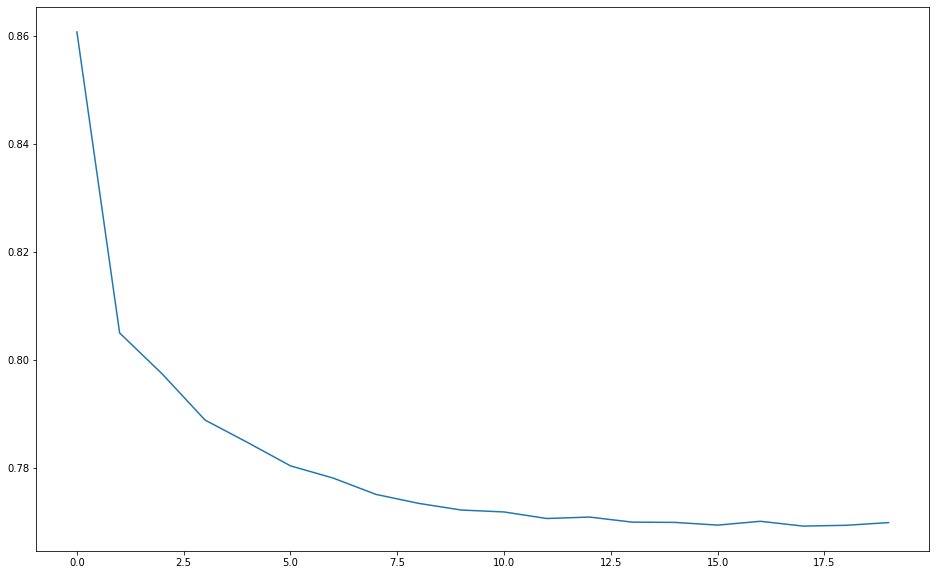

In [ ]:
loss = history_train
print(loss)
epochs = range(0, 20)

plt.figure(figsize=(16, 10))
sns.lineplot(epochs, loss)

In [ ]:
set_random_seed(1337)
assert test(model, criterion, test_loader).shape[0] == y_test.shape[0]

  0%|          | 0/26 [00:00<?, ?it/s]

RMSE =  8.738930439766895


## Задание 2. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Напишите небольшой отчет о том, как вы добились полученного качества: какие средства использовали и какие эксперименты проводили. Подробно расскажите об архитектурах и значениях гиперпараметров, а также какие метрики на тесте они показывали. Чтобы отчет был зачтен, необходимо привести хотя бы 3 эксперимента.